# CNN 3 - Getting started with Convolutional layers
- Dataset:
    - https://www.kaggle.com/shaunthesheep/microsoft-catsvsdogs-dataset
    
**Before you start**
- I got TensorFlow errors during training because a couple of images were corrupted
- Before continuing, please delete the following images:
    - `data\train\cat\666.jpg`
    - `data\train\dog\11702.jpg`

In [1]:
import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

<br>

## Normalizing image data
- Let's load in a sample image:

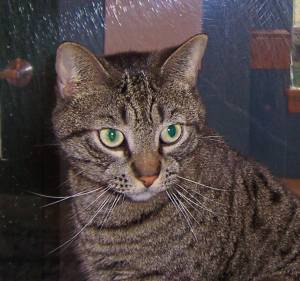

In [2]:
img1 = Image.open('data/train/cat/1.jpg')
display(img1)

- And check it's shape

In [3]:
np.array(img1).shape

(281, 300, 3)

- It's 281 pixels wide, 300 pixels tall, and has 3 color channels
- Let's load in another image and see if the same applies:

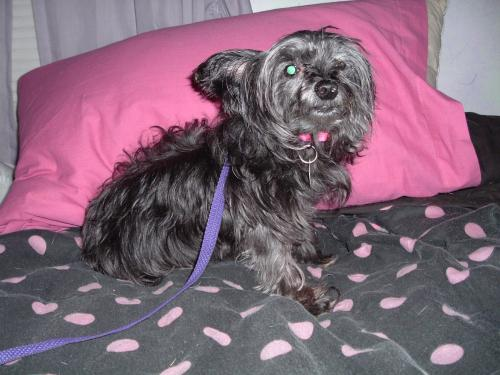

In [4]:
img2 = Image.open('data/train/dog/0.jpg')
display(img2)

In [5]:
np.array(img2).shape

(375, 500, 3)

- The second image is much larger
- Neural network doesn't like that - it expects images (arrays) of identical sizes
- You'll see later how to resize them on the fly
- First, let's see how a single image looks like when represented as an array:

In [6]:
np.array(img2)

array([[[117, 115, 126],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [132, 132, 142],
        [131, 131, 141],
        [131, 131, 141]],

       [[118, 116, 127],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [134, 134, 144],
        [133, 133, 143],
        [133, 133, 143]],

       [[119, 117, 128],
        [118, 116, 127],
        [120, 118, 131],
        ...,
        [136, 136, 146],
        [135, 135, 145],
        [135, 135, 145]],

       ...,

       [[ 75,  80,  84],
        [ 70,  75,  79],
        [ 69,  74,  78],
        ...,
        [ 74,  82,  85],
        [ 70,  78,  81],
        [ 67,  75,  78]],

       [[ 74,  79,  83],
        [ 68,  73,  77],
        [ 65,  70,  74],
        ...,
        [ 66,  74,  77],
        [ 67,  75,  78],
        [ 68,  76,  79]],

       [[ 70,  75,  79],
        [ 67,  72,  76],
        [ 66,  71,  75],
        ...,
        [ 69,  77,  80],
        [ 67,  75,  78],
        [ 65,  73,  76]]

- It's in a range between 0 and 255 for every single color channel (red, green, and blue)
- Neural networks prefer a range between 0 and 1
- We can translate it to that range by dividing each element of an array by 255.0:

In [7]:
np.array(img2) / 255.0

array([[[0.45882353, 0.45098039, 0.49411765],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.51764706, 0.51764706, 0.55686275],
        [0.51372549, 0.51372549, 0.55294118],
        [0.51372549, 0.51372549, 0.55294118]],

       [[0.4627451 , 0.45490196, 0.49803922],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.5254902 , 0.5254902 , 0.56470588],
        [0.52156863, 0.52156863, 0.56078431],
        [0.52156863, 0.52156863, 0.56078431]],

       [[0.46666667, 0.45882353, 0.50196078],
        [0.4627451 , 0.45490196, 0.49803922],
        [0.47058824, 0.4627451 , 0.51372549],
        ...,
        [0.53333333, 0.53333333, 0.57254902],
        [0.52941176, 0.52941176, 0.56862745],
        [0.52941176, 0.52941176, 0.56862745]],

       ...,

       [[0.29411765, 0.31372549, 0.32941176],
        [0.2745098 , 0.29411765, 0.30980392],
        [0.27058824, 0

- That's the only argument we'll pass to the TensorFlow's ImageDataGenerator - rescaling
- There are others available, and we'll cover them in a couple of notebooks when learning data augmentation

<br>

## Data loaders
- You can use the `ImageDataGenerator` class from TensorFlow to specify how the image data will be generated
- We'll only apply rescaling - 1 / 255.0
- We'll do this for both trianing and validation images:

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

- You can now use this generator to load in data from a directory
- Specify the directory path, and a siye to which each image will be resized
    - 224x224 works well with neural networks, especially with transfer learning models (more on these in a couple of notebooks)
- Set `class_mode='categorical'`, since we have two distinct classes
- Set `batch_siye=64` or anything you want, it represents the number of images _shown_ to a neural network at once
- The `seed` parameter is here so you can get the same images as I did:

In [9]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20030 images belonging to 2 classes.


- There are 20030 images in the training folder divided into two classes - as reported by the loader
- The `train_data` is basically a Python generator object
- You can call `next()` on it to get the first batch:

In [10]:
first_batch = train_data.next()

- Each batch contains images and labels
- Let's check the shape:

In [11]:
first_batch[0].shape, first_batch[1].shape

((64, 224, 224, 3), (64, 2))

- So, a single batch contains 64 images, each being 224 pixels wide and tall with 3 color channels
- There are 64 corresponding labels, each is an array of two elements - probability of an image being a cat (0) ond a dog (1)

<br>

## Visualizing a single batch
- It's always recommended to visalize your data
- The `visualize_batch()` function, well, visualizes a single batch
- There are 64 images in the batch, so the function plots a grid of 8x8 images:

In [12]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator):
    n = 64
    num_row, num_col = 8, 8
    fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
    
    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()

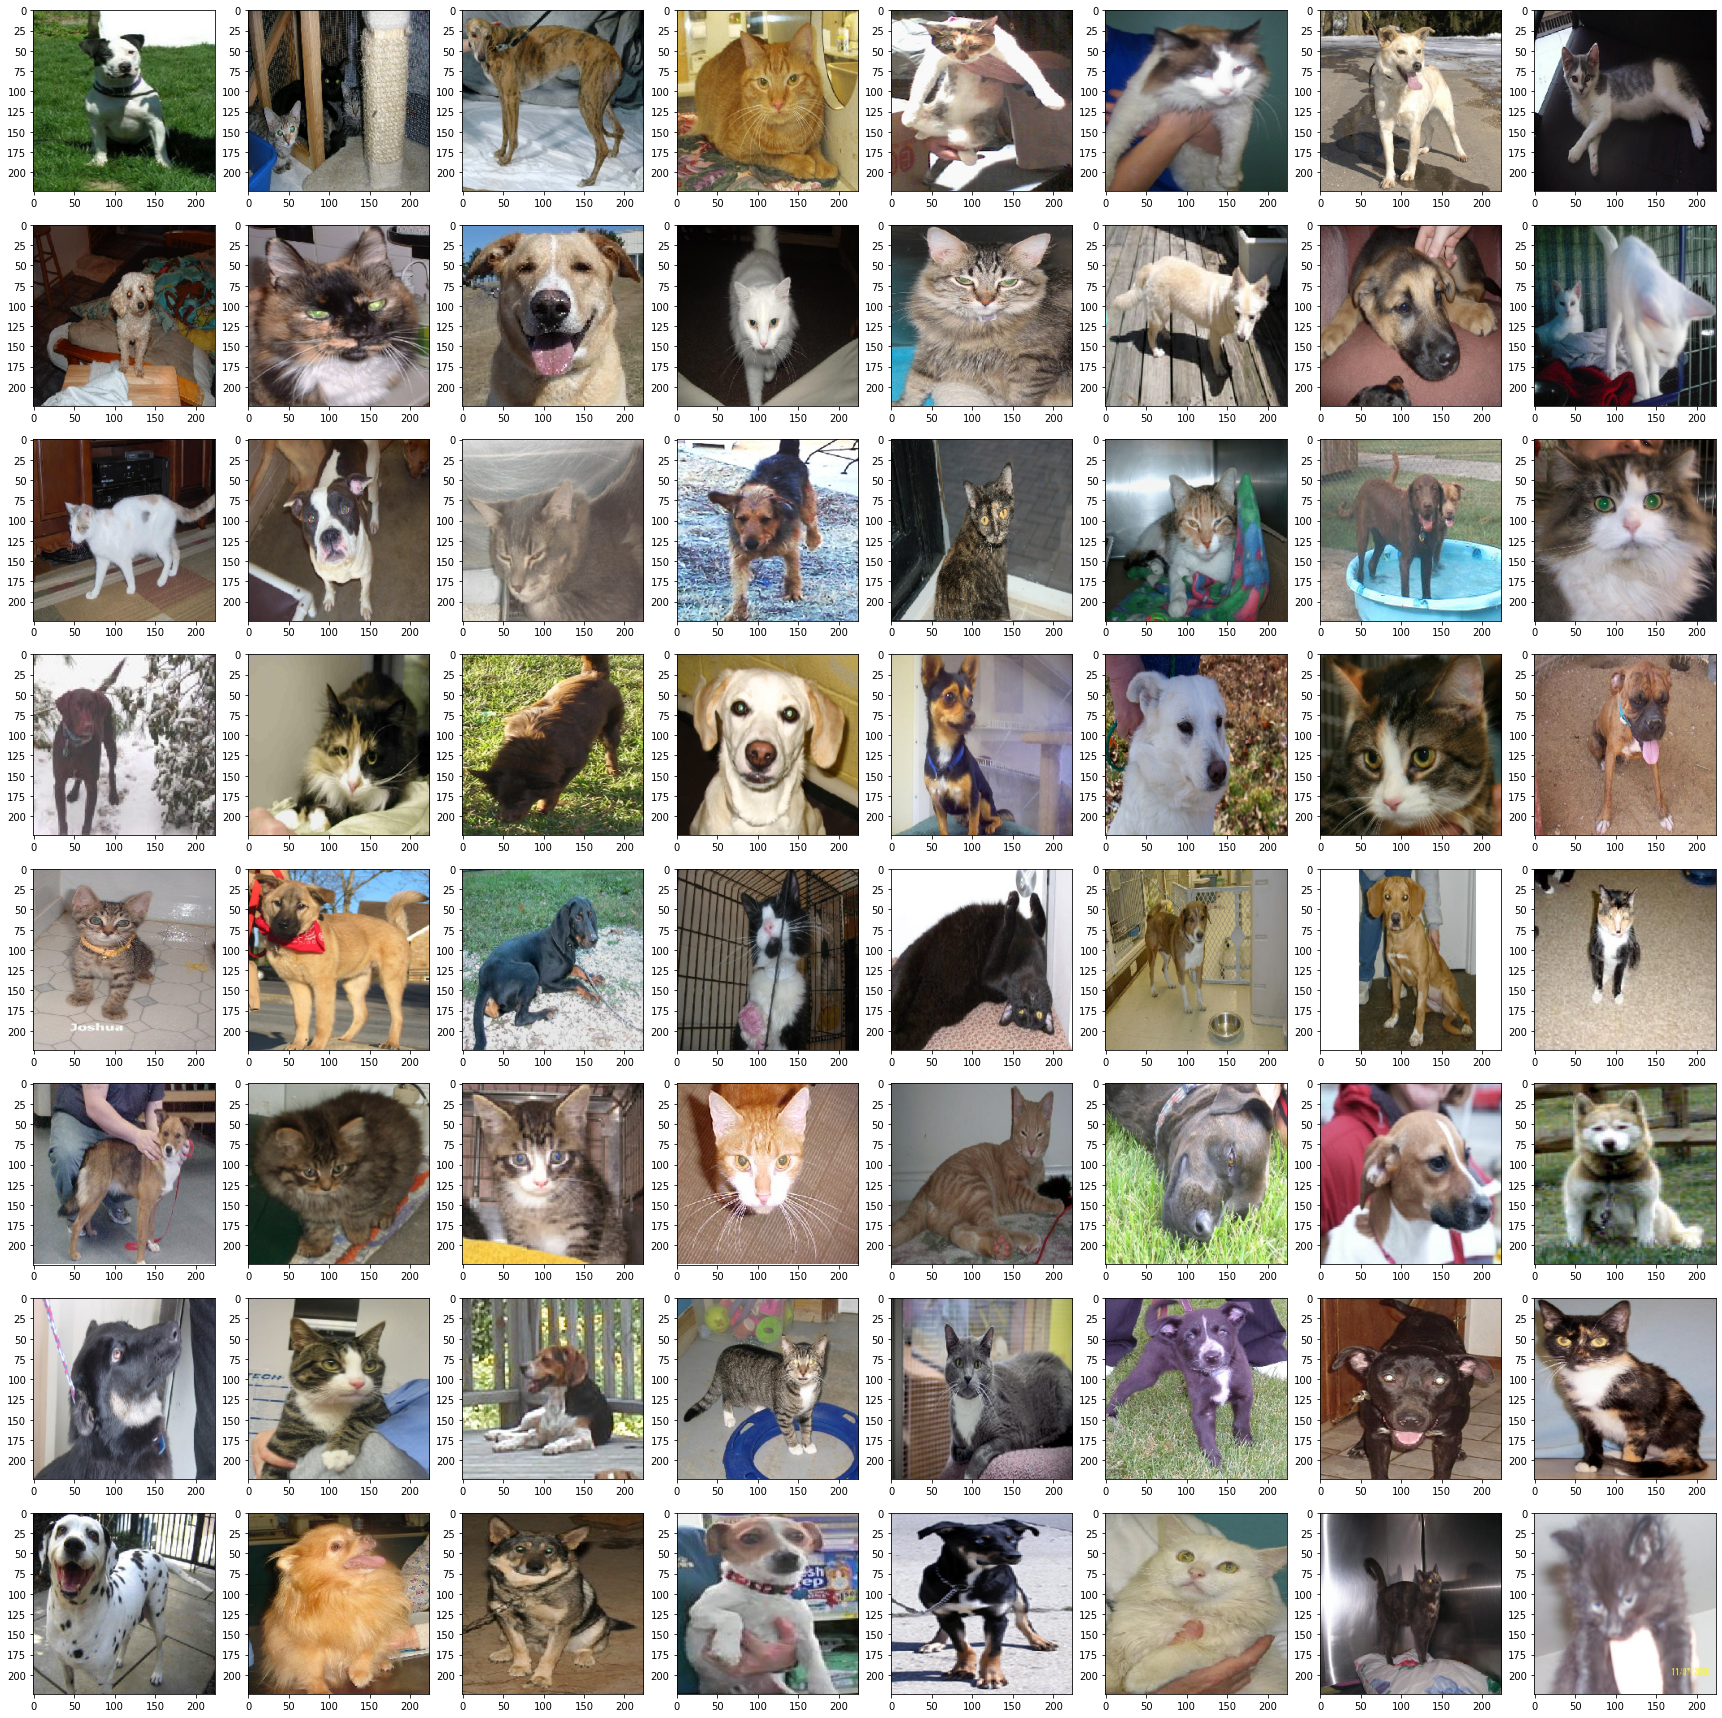

In [13]:
visualize_batch(batch=first_batch)

- Some of them look a bit weird due to change in the aspect ratio, but we should be fine
- Let's reset the data loaders, as we called `next()` before:

In [14]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory='data/validation/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20030 images belonging to 2 classes.
Found 2478 images belonging to 2 classes.


<br>

## Training a Convolutional model
- Just like with regular ANN's (Dense layers), Convolutional Neural Networks boil down to experimentation
- You can't know beforehand how many Convolutional layers you'll need, what's the ideal number of filters for each, and what's the optimal kernel size
- Convolutional layers are usually followed by a Pooling layer, to reduce the image size
- When finished with Convolutional layers, make sure to add a Flatten layer
- Add Dense layers as you normally would from there
- Keep in mind the ouput layer and the loss function
    - Use softmax activation at output, as sigmoid only works when you have a single output node
    - Track loss through categorical cross entropy
- We'll train the model for 10 epochs, which is completely random:

In [15]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
313/313 [==============================] - 25s 75ms/step - loss: 1.3403 - accuracy: 0.6122 - val_loss: 0.6245 - val_accuracy: 0.6679
Epoch 2/10
313/313 [==============================] - 22s 72ms/step - loss: 0.5670 - accuracy: 0.7074 - val_loss: 0.5685 - val_accuracy: 0.7078
Epoch 3/10
313/313 [==============================] - 22s 70ms/step - loss: 0.4353 - accuracy: 0.7975 - val_loss: 0.5636 - val_accuracy: 0.7191
Epoch 4/10
313/313 [==============================] - 23s 73ms/step - loss: 0.3122 - accuracy: 0.8706 - val_loss: 0.6184 - val_accuracy: 0.7175
Epoch 5/10
313/313 [==============================] - 23s 73ms/step - loss: 0.2106 - accuracy: 0.9222 - val_loss: 0.7127 - val_accuracy: 0.7191
Epoch 6/10
313/313 [==============================] - 22s 71ms/step - loss: 0.1279 - accuracy: 0.9604 - val_loss: 0.8568 - val_accuracy: 0.7098
Epoch 7/10
313/313 [==============================] - 22s 71ms/step - loss: 0.0843 - accuracy: 0.9763 - val_loss: 0.9723 - val_accuracy:

- 71.23% accuracy after 10 epochs
- Does doubling the number of filters in our single Convolutional layers make a difference?

In [16]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
313/313 [==============================] - 23s 71ms/step - loss: 1.3585 - accuracy: 0.6531 - val_loss: 0.5512 - val_accuracy: 0.7195
Epoch 2/10
313/313 [==============================] - 22s 69ms/step - loss: 0.4737 - accuracy: 0.7718 - val_loss: 0.5673 - val_accuracy: 0.7244
Epoch 3/10
313/313 [==============================] - 22s 70ms/step - loss: 0.3258 - accuracy: 0.8608 - val_loss: 0.5807 - val_accuracy: 0.7341
Epoch 4/10
313/313 [==============================] - 22s 70ms/step - loss: 0.1972 - accuracy: 0.9256 - val_loss: 0.7323 - val_accuracy: 0.7195
Epoch 5/10
313/313 [==============================] - 22s 70ms/step - loss: 0.1049 - accuracy: 0.9674 - val_loss: 0.8628 - val_accuracy: 0.7236
Epoch 6/10
313/313 [==============================] - 22s 70ms/step - loss: 0.0766 - accuracy: 0.9816 - val_loss: 1.0396 - val_accuracy: 0.7288
Epoch 7/10
313/313 [==============================] - 22s 70ms/step - loss: 0.0463 - accuracy: 0.9916 - val_loss: 1.1328 - val_accuracy:

- Maybe, but the model generally doesn't look like it's learning
- Let's add another Convolutional layer
    - Keep in mind: Only the first convolutional layer needs the `input_shape` parameter

In [17]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_3.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_3 = model_3.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
313/313 [==============================] - 23s 71ms/step - loss: 0.6777 - accuracy: 0.6630 - val_loss: 0.5830 - val_accuracy: 0.7062
Epoch 2/10
313/313 [==============================] - 22s 70ms/step - loss: 0.4752 - accuracy: 0.7735 - val_loss: 0.4919 - val_accuracy: 0.7672
Epoch 3/10
313/313 [==============================] - 22s 71ms/step - loss: 0.3391 - accuracy: 0.8497 - val_loss: 0.5237 - val_accuracy: 0.7571
Epoch 4/10
313/313 [==============================] - 22s 71ms/step - loss: 0.1974 - accuracy: 0.9218 - val_loss: 0.6067 - val_accuracy: 0.7522
Epoch 5/10
313/313 [==============================] - 22s 71ms/step - loss: 0.0779 - accuracy: 0.9756 - val_loss: 0.8971 - val_accuracy: 0.7534
Epoch 6/10
313/313 [==============================] - 22s 71ms/step - loss: 0.0373 - accuracy: 0.9903 - val_loss: 1.1091 - val_accuracy: 0.7494
Epoch 7/10
313/313 [==============================] - 22s 72ms/step - loss: 0.0256 - accuracy: 0.9945 - val_loss: 1.1742 - val_accuracy:

- Much better - we're at 75% now on the validation set
- Let's use this model to make predictions

<br>

## Making predictions on new images
- You have to apply the same preprocessing operations to the unseen images
- I've forgot to do so many times on my job, and it results in some wierd and uncertain predictions (small difference between prediction probabilities)
- We'll declare a `prepare_single_image()` function which resizes an image to 224x224 and rescales it to a 0-1 range:

In [18]:
def prepare_single_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = img.resize(size=(224, 224))
    return np.array(img) / 255.0

- Let's test it on a single image:

In [19]:
single_image = prepare_single_image(img_path='data/test/cat/10018.jpg')
single_image

array([[[0.19607843, 0.15294118, 0.09803922],
        [0.15294118, 0.11764706, 0.07058824],
        [0.14509804, 0.11372549, 0.07058824],
        ...,
        [0.60392157, 0.60392157, 0.63921569],
        [0.44313725, 0.44705882, 0.5254902 ],
        [0.05098039, 0.04313725, 0.1372549 ]],

       [[0.22745098, 0.18039216, 0.1254902 ],
        [0.19607843, 0.14901961, 0.10196078],
        [0.15294118, 0.11372549, 0.0745098 ],
        ...,
        [0.6745098 , 0.67843137, 0.69019608],
        [0.27843137, 0.27058824, 0.35294118],
        [0.11372549, 0.09803922, 0.2       ]],

       [[0.25490196, 0.19607843, 0.14509804],
        [0.23529412, 0.18431373, 0.13333333],
        [0.19215686, 0.14901961, 0.10588235],
        ...,
        [0.74117647, 0.74509804, 0.74117647],
        [0.15686275, 0.14117647, 0.21960784],
        [0.17254902, 0.1372549 , 0.25490196]],

       ...,

       [[0.45098039, 0.38039216, 0.24705882],
        [0.45098039, 0.39215686, 0.25098039],
        [0.45490196, 0

- And now let's make a single prediction
- Note the `reshape()` function - try removing it and see what happens
- There's an easier way, and you'll see it in a bit

In [20]:
single_prediction = model_3.predict(single_image.reshape(-1, 224, 224, 3))
single_prediction

array([[1.00000e+00, 4.78744e-12]], dtype=float32)

- These are basically prediction probabilities
- The model almost 100% certain that the class at index 0 is present on the image
- Remember: 0 = cat, 1 = dog
- You can use the argmax function to get the index where the value of an array is the highest:

In [21]:
single_prediction.argmax()

0

- Let+s make predictions for an entire folder of images
- First for the cats
- The top two variables will track how many predictions were made, and how many of these were correct
- Note the `expand_dims()` function - it's an alternative to `reshape()`
    - You can use either
- Prediction fails on some images probably because they are corrupted, so wrap the code inside a `try .. except` block:

In [23]:
num_total_cat, num_correct_cat = 0, 0

for img_path in pathlib.Path.cwd().joinpath('data/test/cat').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_3.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_cat += 1
        if pred == 0:
            num_correct_cat += 1
    except Exception as e:
        continue

- Total predictions made:

In [24]:
num_total_cat

1244

- Accuracy for cats:

In [25]:
num_correct_cat / num_total_cat

0.7757234726688103

- Not too bad - let's do the same for dogs:

In [26]:
num_total_dog, num_correct_dog = 0, 0

for img_path in pathlib.Path.cwd().joinpath('data/test/dog').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_3.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_dog += 1
        if pred == 1:
            num_correct_dog += 1
    except Exception as e:
        continue

In [27]:
num_total_dog

1240

In [28]:
num_correct_dog / num_total_dog

0.760483870967742

- Overall, we have a much more accurate model than when we were only using Dense layers
- This is just a tip of the iceberg
    - We haven't explored data augmentation and transfer learning
    - You wouldn't believe how much these will increase the accuracy